# Multicollinearity Example in Pyhton

Atsushi Ishida (Kwansei Gakuin University)

## Single regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation

In [2]:
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # diagonal covariance

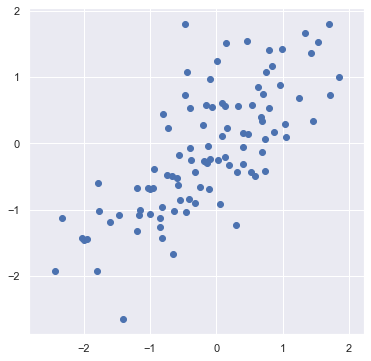

In [3]:
x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axis('equal')
plt.show()

In [4]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

print('coefficient = ', model.coef_[0])
print('intercept = ', model.intercept_)
print('R square = ', model.score(x[:, np.newaxis], y))

coefficient =  0.7256357331145741
intercept =  -0.015060471797253769
R square =  0.5384826782751724


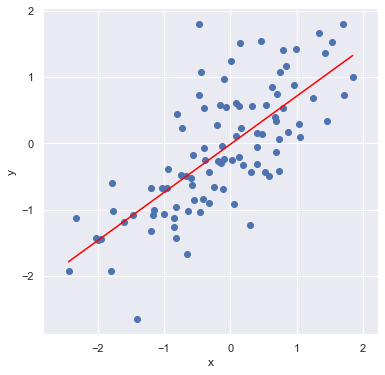

In [5]:
xfit = np.linspace(np.min(x), np.max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(xfit, yfit, c="red")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()

In [6]:
def reg(mean, cov):
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    model = LinearRegression(fit_intercept=True)
    model.fit(x[:, np.newaxis], y)
    xfit = np.linspace(np.min(x), np.max(x), 1000)
    yfit = model.predict(xfit[:, np.newaxis])
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y)
    plt.plot(xfit, yfit, c="red")
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    plt.show()

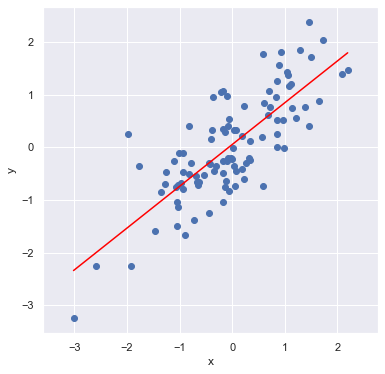

In [7]:
reg(mean, cov)

## Multiple regression

https://gist.github.com/aricooperdavis/c658fc1c5d9bdc5b50ec94602328073b

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

In [9]:
mean3 = [0, 0, 0]
cov3 = [[1, 0, 0.8], [0, 1, 0.7], [0.8, 0.7, 1]] 

In [10]:
data = np.random.multivariate_normal(mean3, cov3, 100)

C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


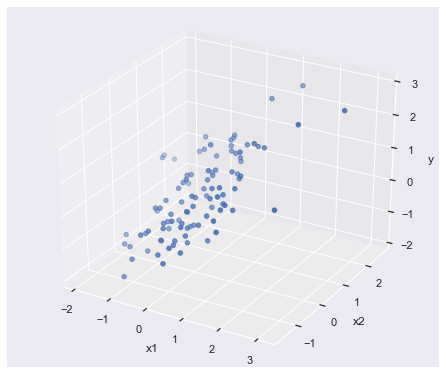

In [11]:
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

In [12]:
model = LinearRegression(fit_intercept=True)
model.fit(data[:,0:2], data[:,2])

print('coefficient = ', model.coef_)
print('intercept = ', model.intercept_)
print('R square = ', model.score(data[:,0:2], data[:,2]))

coefficient =  [0.63538705 0.64977993]
intercept =  0.02838919498736342
R square =  0.8515898327630095


In [13]:
coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.linspace(-3,3), (50,1))
ys = np.tile(np.linspace(-3,3), (50,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

Equation: y = 0.03 + 0.64x1 + 0.65x2


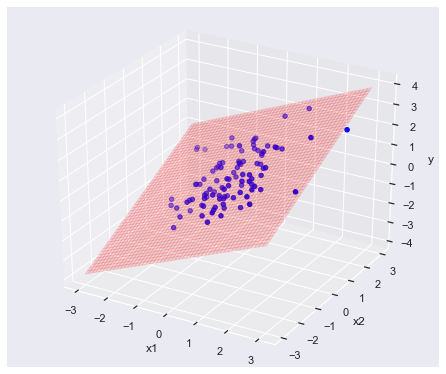

In [14]:
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2],color="blue")
ax.plot_surface(xs,ys,zs, alpha=0.1, 
                color="red", edgecolor="red")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

In [15]:
def multi_reg(mean, cov):
    data = np.random.multivariate_normal(mean, cov, 100)
    model = LinearRegression(fit_intercept=True)
    model.fit(data[:,0:2], data[:,2])
    coefs = model.coef_
    intercept = model.intercept_
    xs = np.tile(np.linspace(-3,3), (50,1))
    ys = np.tile(np.linspace(-3,3), (50,1)).T
    zs = xs*coefs[0]+ys*coefs[1]+intercept
    fig = plt.figure(figsize=(6, 5))
    ax = Axes3D(fig)
    # ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2],color="blue")
    ax.plot_surface(xs,ys,zs, alpha=0.1, 
                    color="red", edgecolor="red")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    plt.show()

C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


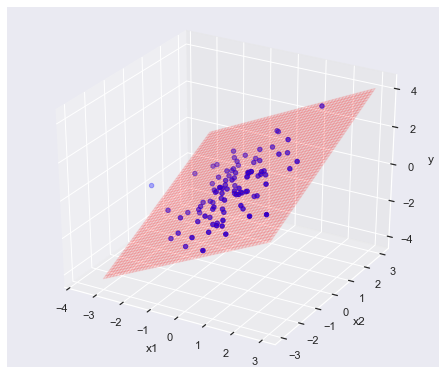

In [16]:
multi_reg(mean3, cov3)

## Grasping multico (not working in vscode so far)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# fixing beta as 0.8
sigma_x = 0.01
mean = [0, 0]
cov = [[sigma_x, 0.8 * sigma_x], [0.8 * sigma_x, 1]]

<IPython.core.display.Javascript object>


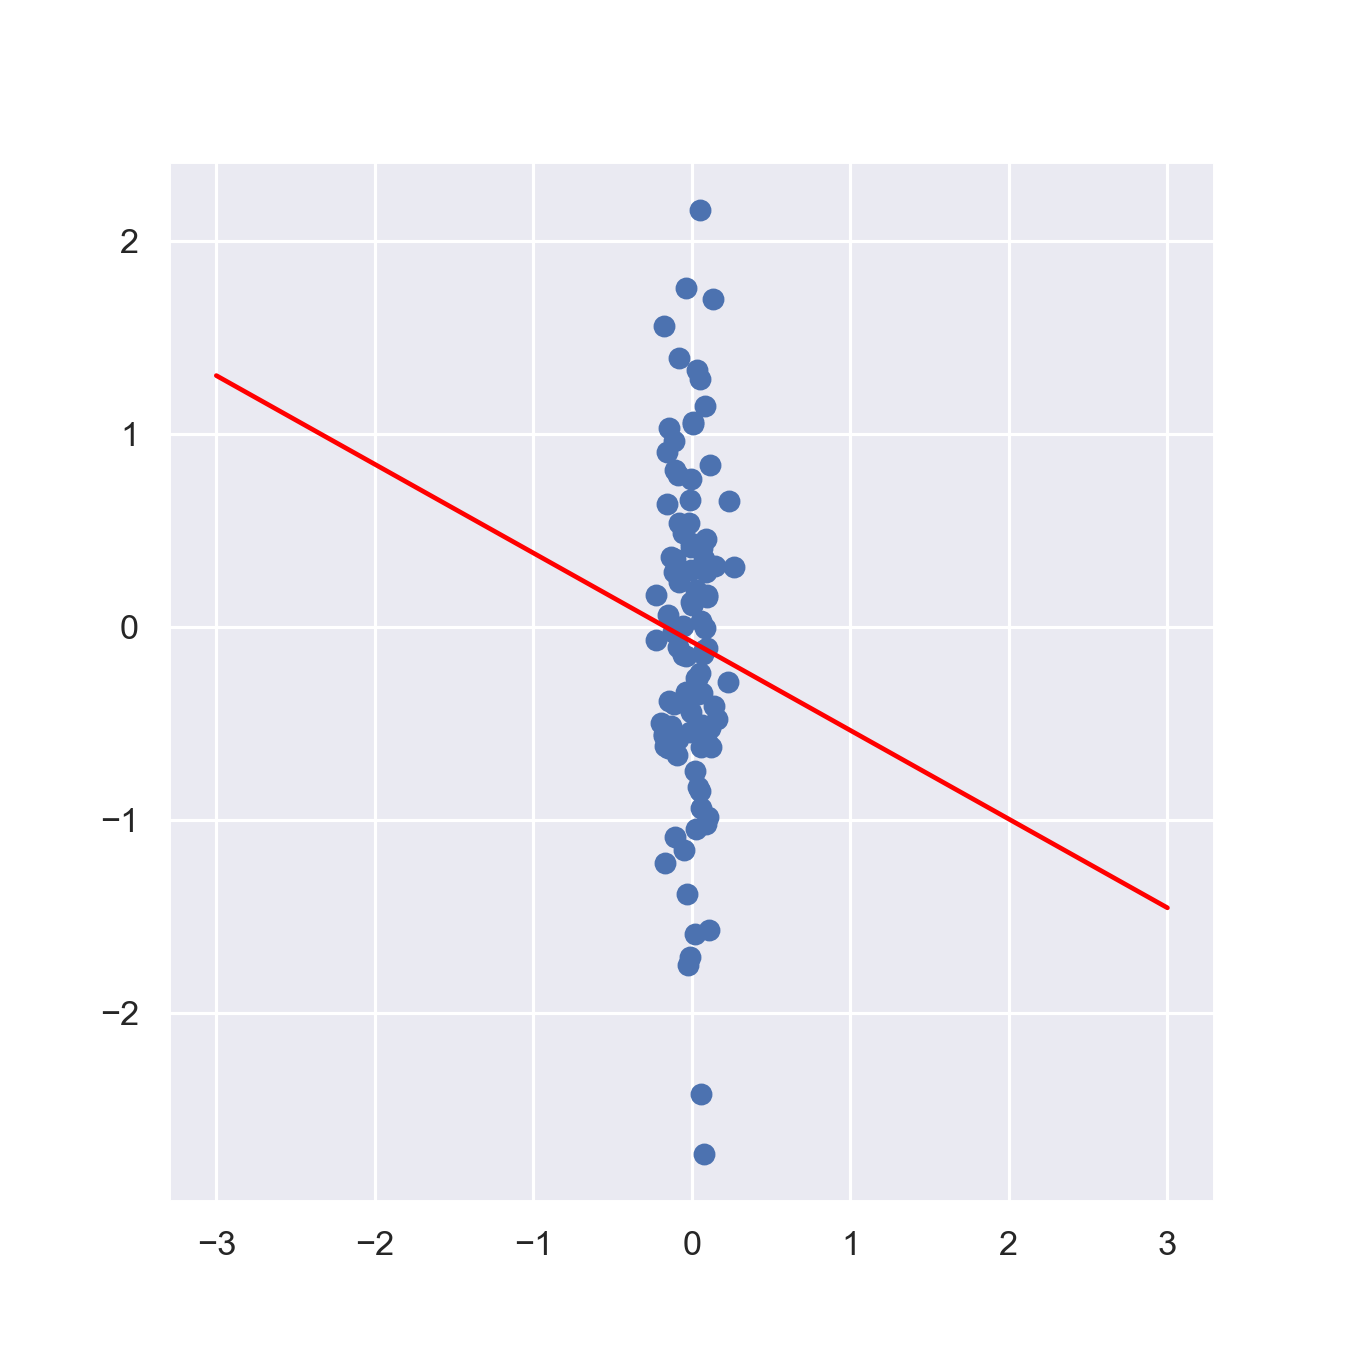

In [3]:
# %matplotlib nbagg
from IPython.display import HTML
HTML(anim.to_html5_video())

fig = plt.figure(figsize=(6, 6))

def plot(t):
    plt.cla()
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    model = LinearRegression(fit_intercept=True)
    model.fit(x[:, np.newaxis], y)
    xfit = np.linspace(-3, 3, 1000)
    yfit = model.predict(xfit[:, np.newaxis])
    im1 = plt.scatter(x, y)
    im2 = plt.plot(xfit, yfit, c="red")

ani = animation.FuncAnimation(fig, plot, interval=100)

In [26]:
r_x1x2 = 0.0
mean3 = [0, 0, 0]
cov3 = [[1, r_x1x2, 0.8], [r_x1x2, 1, 0.7], [0.8, 0.7, 1]]

In [27]:
x1 = []
x2 = []
y = []
xs = []
ys = []
zs = []

for i in range(100):
    data = np.random.multivariate_normal(mean3, cov3, 100)
    x1.append(data[:,0].flatten())
    x2.append(data[:,1].flatten())
    y.append(data[:,2].flatten())
    model = LinearRegression(fit_intercept=True)
    model.fit(data[:,0:2], data[:,2])
    coefs = model.coef_
    intercept = model.intercept_
    xp = np.tile(np.linspace(-3,3), (50,1)).flatten()
    yp = np.tile(np.linspace(-3,3), (50,1)).T.flatten()
    zp = xp*coefs[0]+yp*coefs[1]+intercept
    xs.append(xp)
    ys.append(yp)
    zs.append(zp)

C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\Atsushi\anaconda3\lib\site-packages\ipykernel_launcher.

<IPython.core.display.Javascript object>


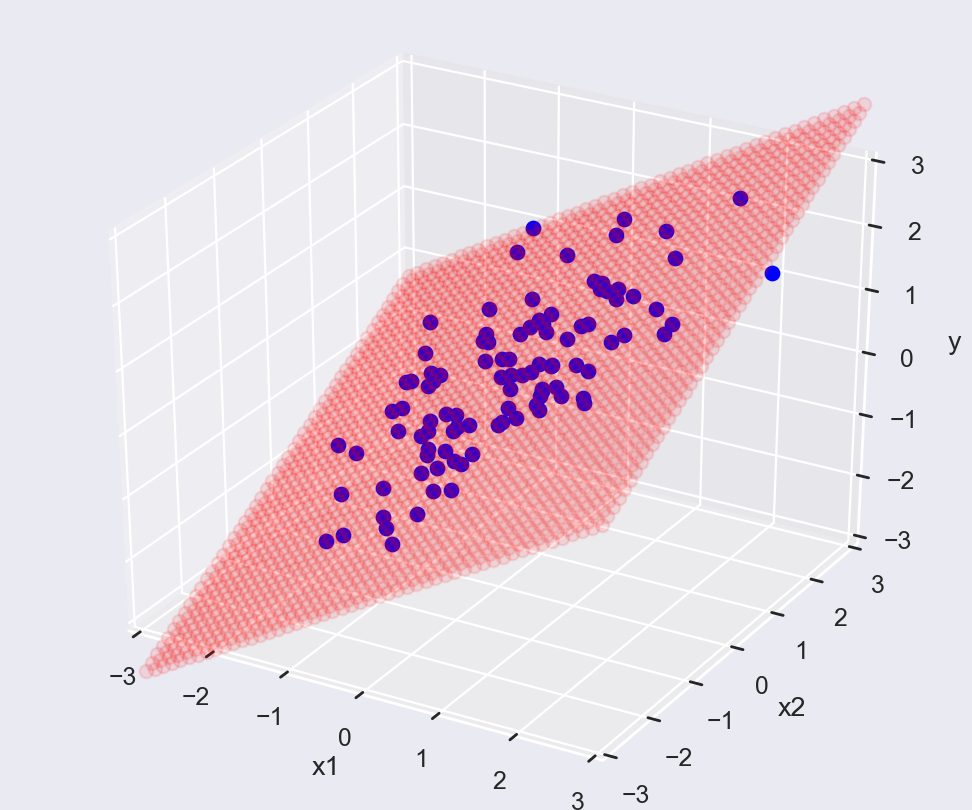

In [28]:
%matplotlib nbagg

fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

scat1, = ax.plot([],[],[],lw=0,marker="o",color="blue")
scat2, = ax.plot([],[],[],lw=0,marker="o",color="red",alpha=0.1)


def plot2(t, x1, x2, y, xs, ys, zs):
    scat1.set_data(x1[t], x2[t])
    scat1.set_3d_properties(y[t])
    scat2.set_data(xs[t], ys[t])
    scat2.set_3d_properties(zs[t])

ani = animation.FuncAnimation(fig, plot2,
                              fargs=(x1, x2, y, xs, ys, zs),
                              interval=100)